Model: `albert-xlarge-v2`

Dataset: squadv2

HPs: wu=100, lr=3e5, bs=32, msl=384

Performance by checkpoint for the following categories:
1. WWWWWWH
2. Answerable vs Unanswerable
3. Answer length
4. Context length
5. Question length

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32

## WWWWWWH

In [4]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [5]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2880, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,w6h_label,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.088692,3.120238,2255,0.080128,5.557802,1248,0.099305,0.099305,1007,44.656319,0.0,44.656319,0.0,other,1,2.88437,0.075802,27,32
1,0.000000,1.463595,736,0.000000,2.812547,383,0.000000,0.000000,353,47.961957,0.0,47.977053,0.0,when,1,2.88437,0.075802,27,32
2,0.000000,2.297142,984,0.000000,4.924592,459,0.000000,0.000000,525,53.353659,0.0,53.353659,0.0,who,1,2.88437,0.075802,27,32
3,0.068811,3.015295,5813,0.109649,6.369850,2736,0.032499,0.032499,3077,52.933081,0.0,52.933081,0.0,what,1,2.88437,0.075802,27,32
4,0.000000,2.544910,429,0.000000,4.873957,224,0.000000,0.000000,205,47.785548,0.0,47.785548,0.0,where,1,2.88437,0.075802,27,32


### Full checkpoints

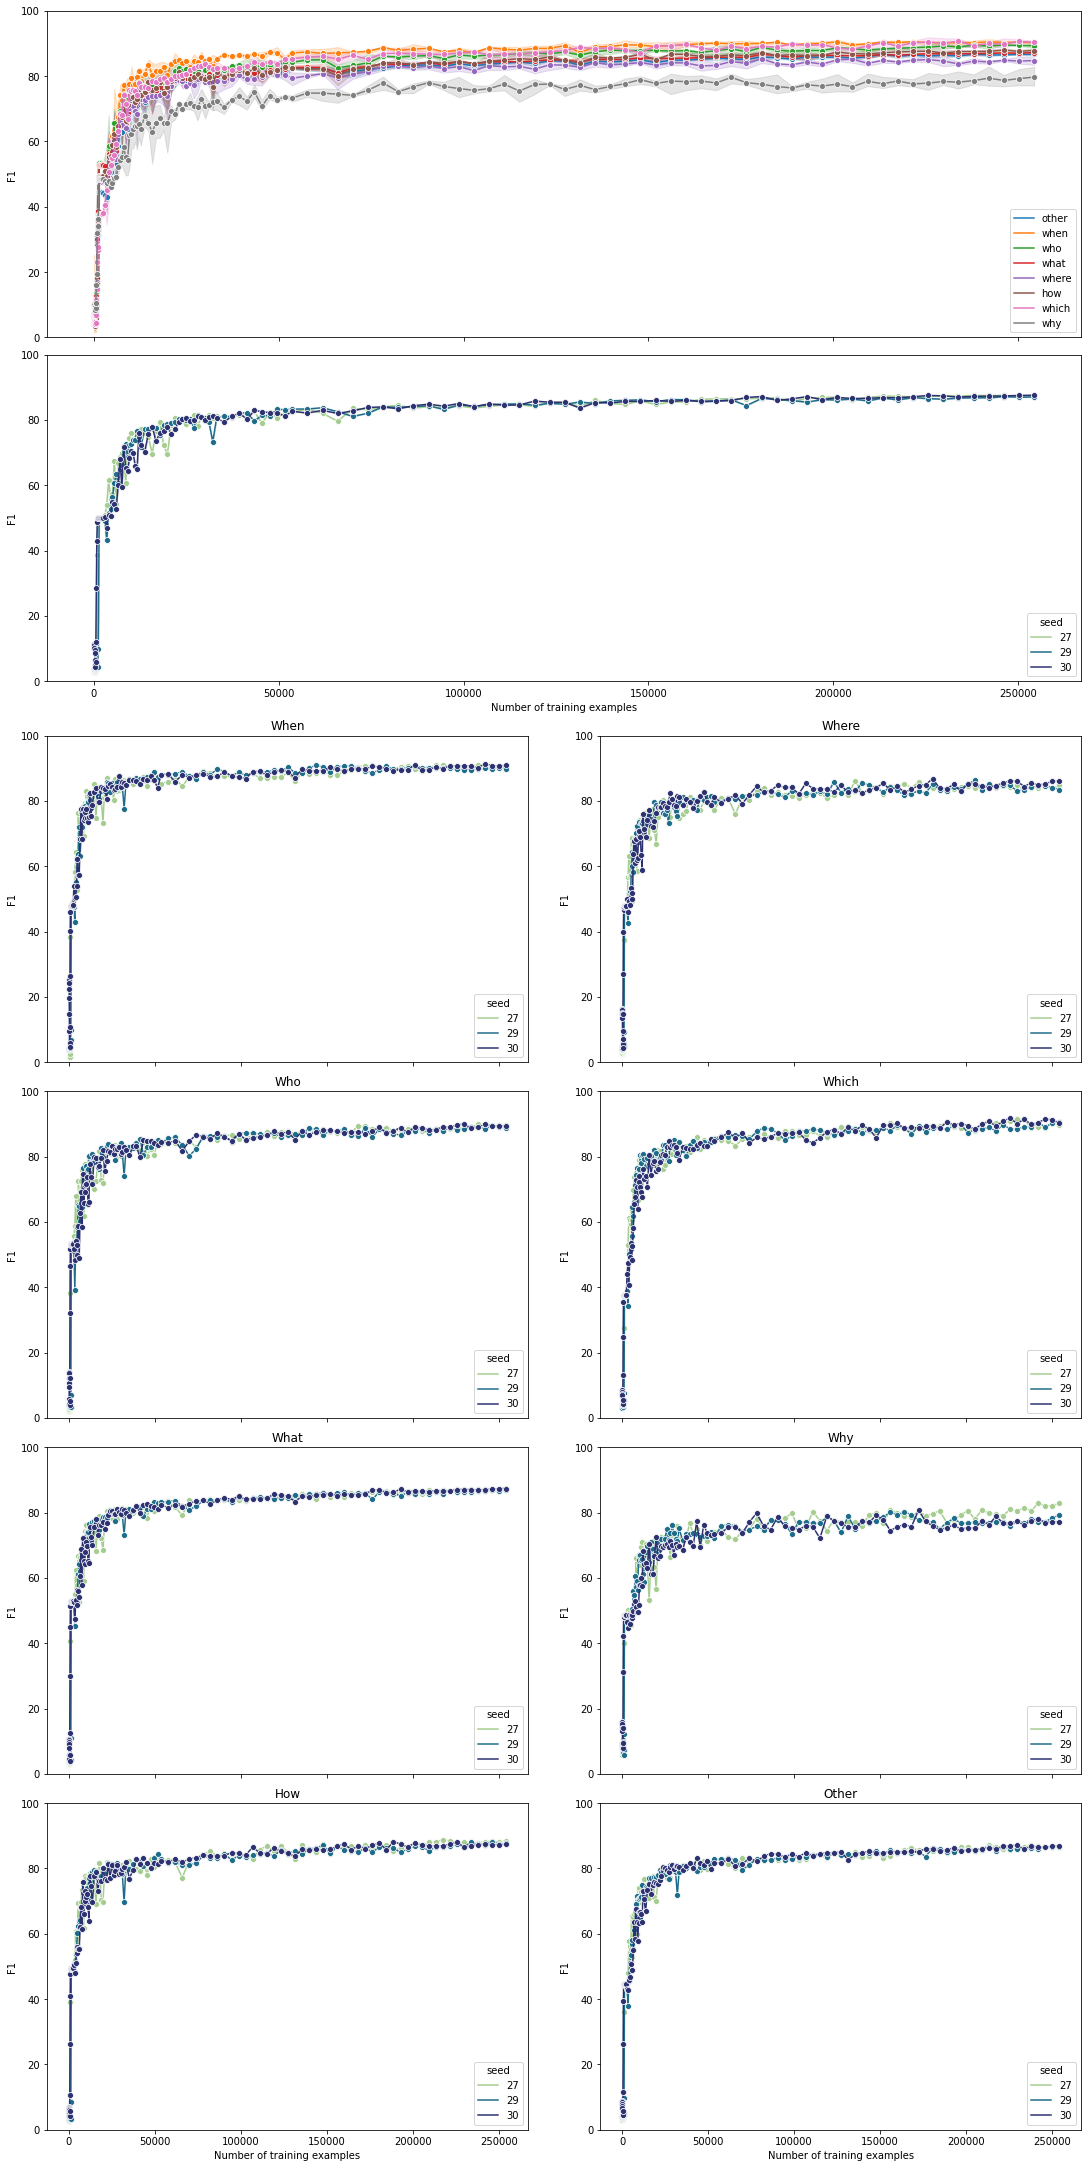

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [7]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 1500]

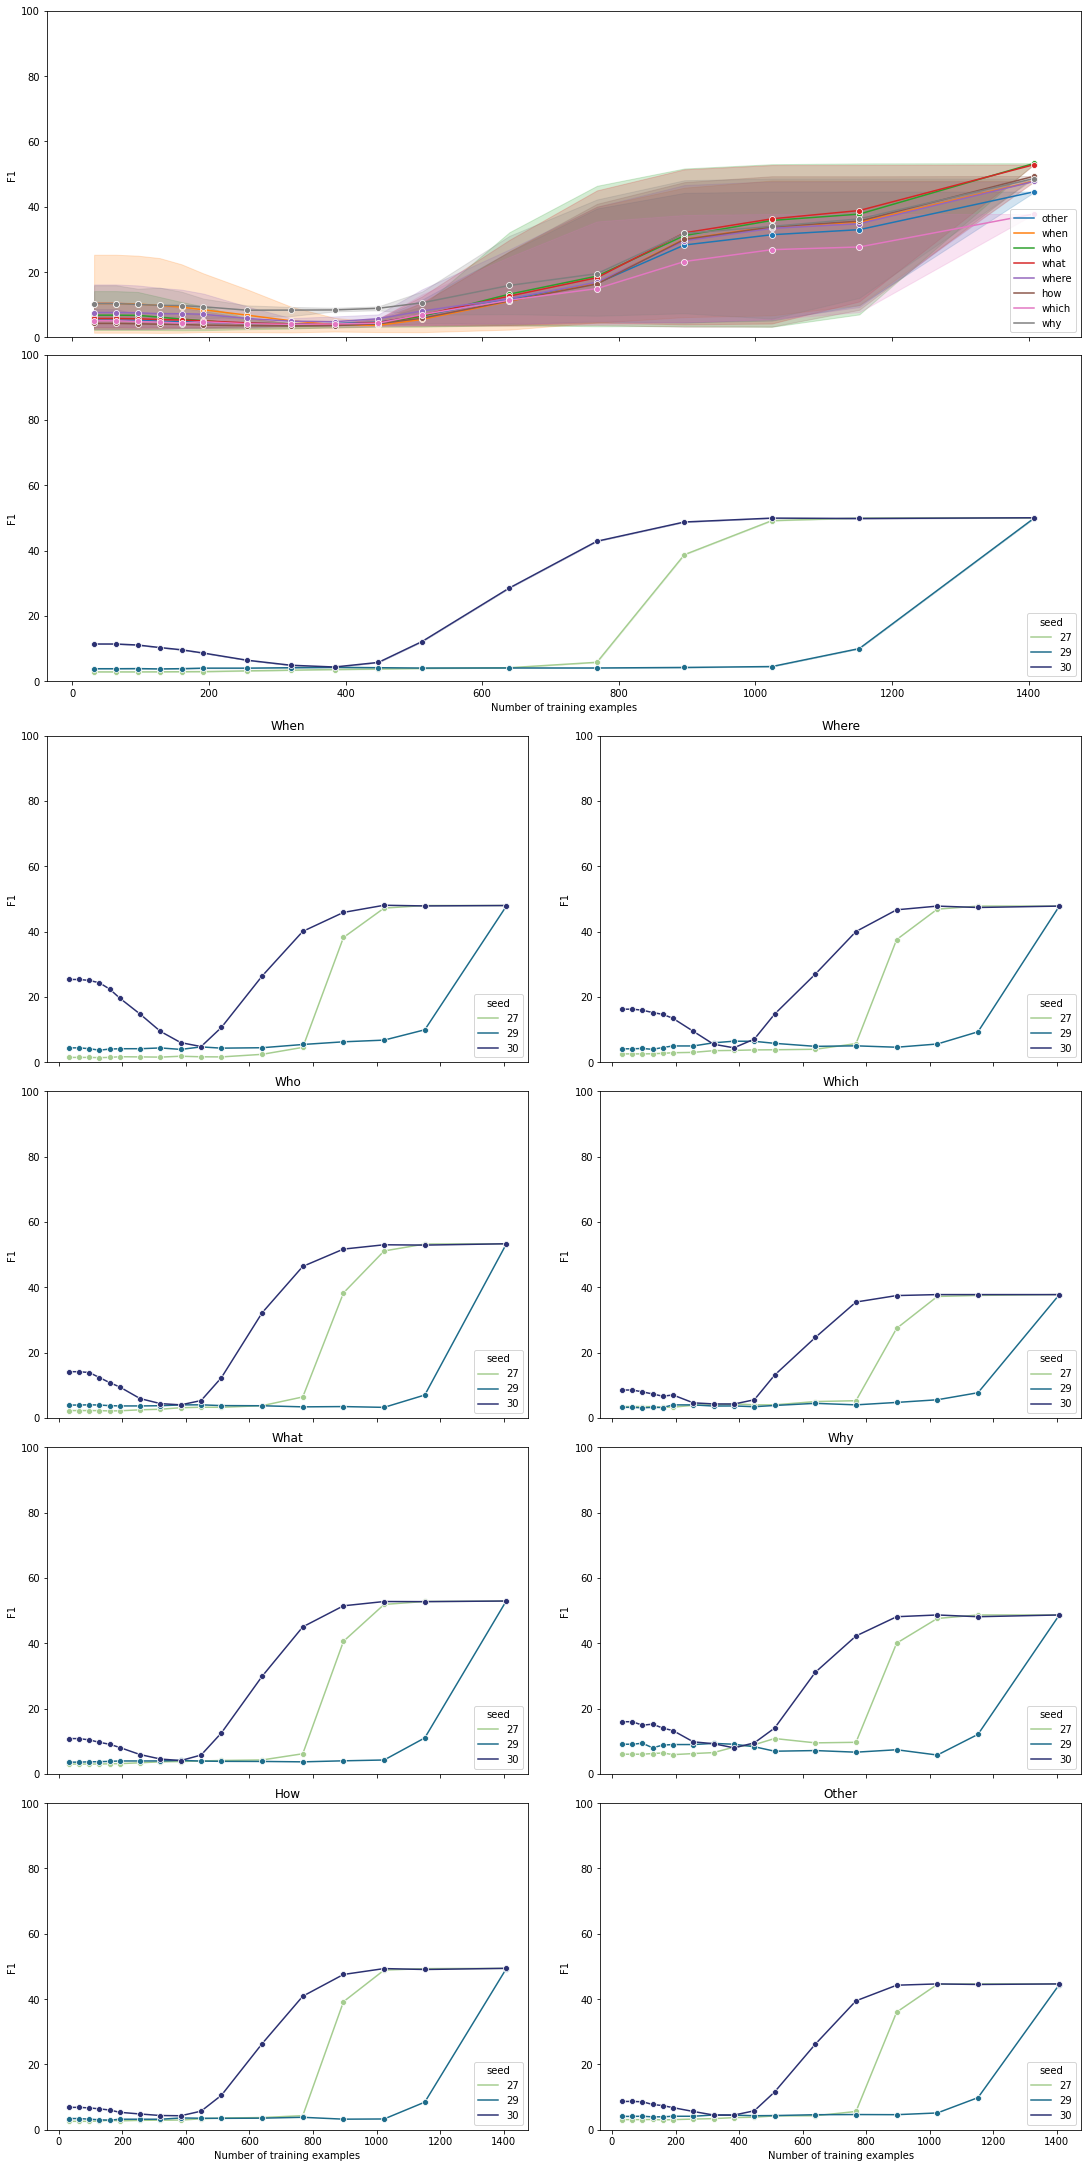

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

## Answerable vs. unanswerable

In [9]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [10]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(720, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,unanswerable,checkpoint,NoAns_exact,NoAns_f1,NoAns_total,overall_f1,overall_exact,seed,num_examples
0,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,1,NaN,NaN,NaN,2.88437,0.075802,27,32
1,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,1,0.084104,0.084104,5945.0,2.88437,0.075802,27,32
2,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,2,NaN,NaN,NaN,2.88437,0.075802,27,64
3,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,2,0.084104,0.084104,5945.0,2.88437,0.075802,27,64
4,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,3,NaN,NaN,NaN,2.88437,0.075802,27,96


### Full checkpoints

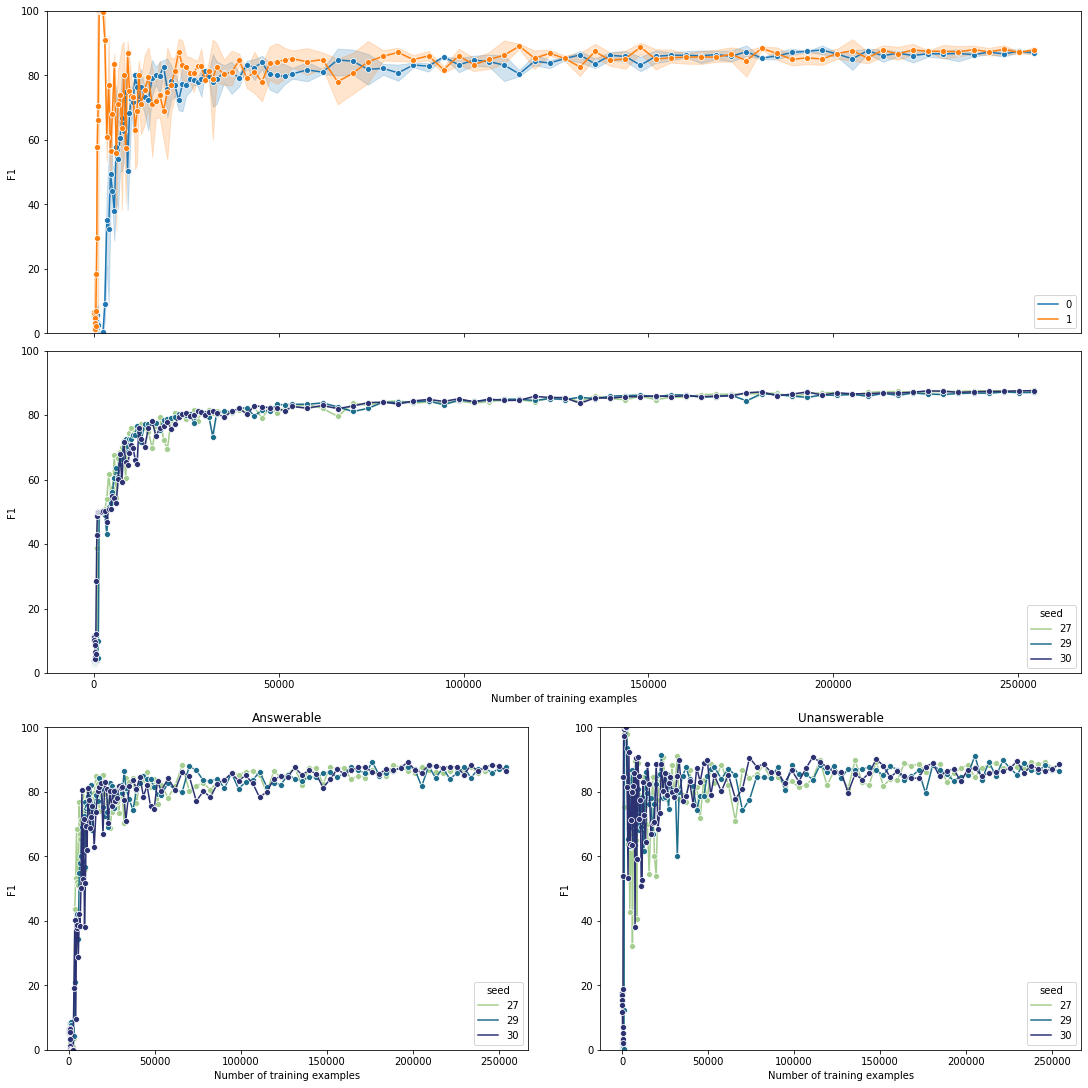

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='unanswerable', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[2, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('Answerable')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['unanswerable'] == 0], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[2, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Unanswerable')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['unanswerable'] == 1], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [12]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

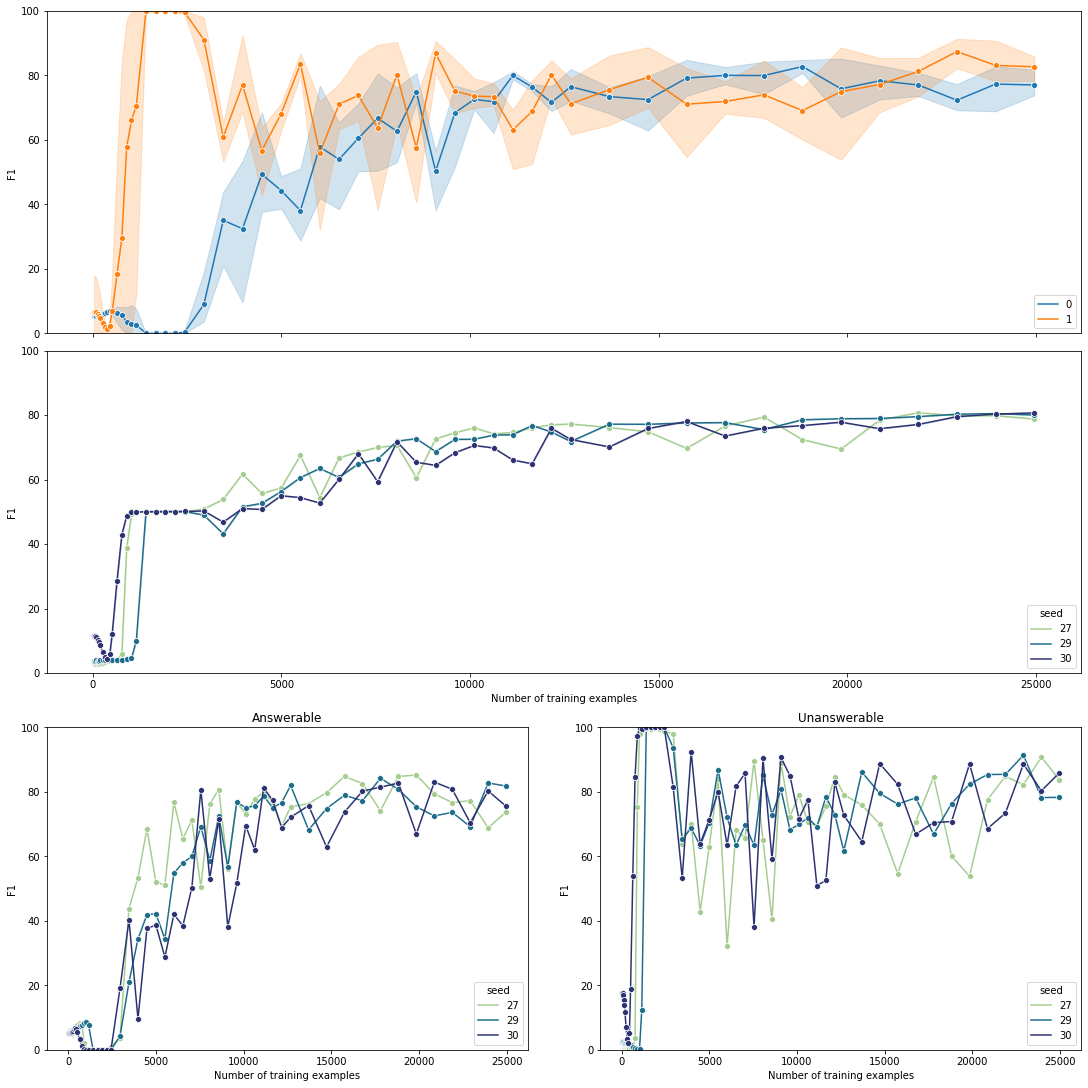

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='unanswerable', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[2, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('Answerable')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['unanswerable'] == 0], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[2, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Unanswerable')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['unanswerable'] == 1], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

## Answer length

In [14]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [15]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(3960, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_mode_length_bin,checkpoint,NoAns_exact,NoAns_f1,NoAns_total,overall_f1,overall_exact,seed,num_examples
0,0.042955,2.996314,2328,0.042955,2.996314,2328.0,0.042955,0.0,2.996314,0.0,1,1,NaN,NaN,NaN,2.88437,0.075802,27,32
1,0.243902,8.965529,410,0.243902,8.965529,410.0,0.243902,0.0,8.965529,0.0,4,1,NaN,NaN,NaN,2.88437,0.075802,27,32
2,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,0,1,0.084104,0.084104,5945.0,2.88437,0.075802,27,32
3,0.119190,6.822634,839,0.119190,6.822634,839.0,0.119190,0.0,6.822634,0.0,3,1,NaN,NaN,NaN,2.88437,0.075802,27,32
4,0.065359,5.036187,1530,0.065359,5.036187,1530.0,0.065359,0.0,5.036187,0.0,2,1,NaN,NaN,NaN,2.88437,0.075802,27,32


### Full checkpoints

In [16]:
np.sort(metrics_by_cat['answer_mode_length_bin'].unique())

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '>9'],
      dtype=object)

Plot answerable questions only

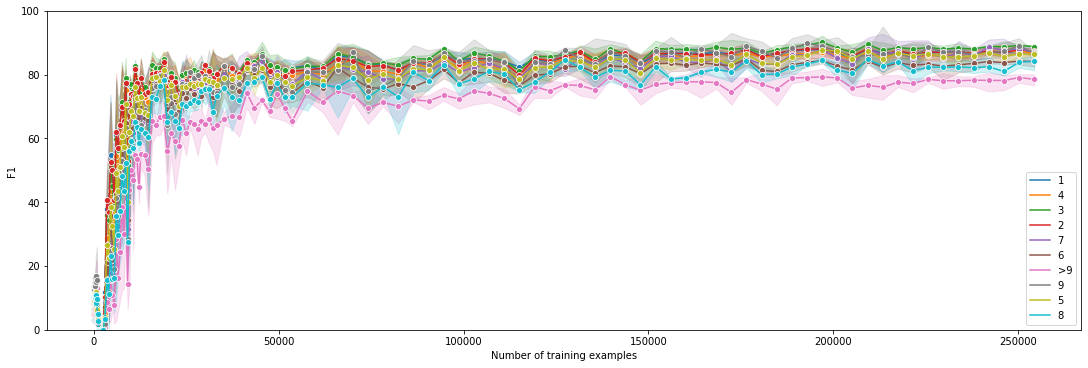

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['answer_mode_length_bin'] != '0'], y='f1', x='num_examples', hue='answer_mode_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

### Initial checkpoints

In [18]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 5000]

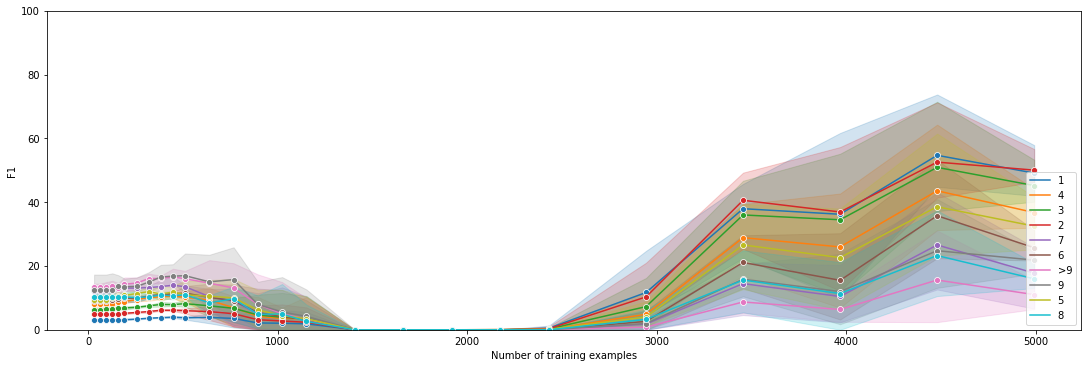

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['answer_mode_length_bin'] != '0'], y='f1', x='num_examples', hue='answer_mode_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

## Context length

In [20]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [21]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2160, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,context_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.045032,2.881774,6662,0.029851,5.671158,3350,0.060386,0.060386,3312,49.714800,0.0,49.716468,0.0,100-200,1,2.88437,0.075802,27,32
1,0.135870,3.060550,736,0.259740,5.850817,385,0.000000,0.000000,351,47.690217,0.0,47.713847,0.0,200-300,1,2.88437,0.075802,27,32
2,0.116442,2.854325,4294,0.095193,5.690848,2101,0.136799,0.136799,2193,51.071262,0.0,51.071262,0.0,0-100,1,2.88437,0.075802,27,32
3,0.000000,1.434885,49,0.000000,2.704207,26,0.000000,0.000000,23,46.938776,0.0,47.309833,0.0,400-500,1,2.88437,0.075802,27,32
4,0.000000,3.585436,99,0.000000,6.697323,53,0.000000,0.000000,46,46.464646,0.0,46.896834,0.0,300-400,1,2.88437,0.075802,27,32


In [22]:
np.sort(metrics_by_cat['context_length_bin'].unique())

array(['0-100', '100-200', '200-300', '300-400', '400-500', '>500'],
      dtype=object)

### Full checkpoints

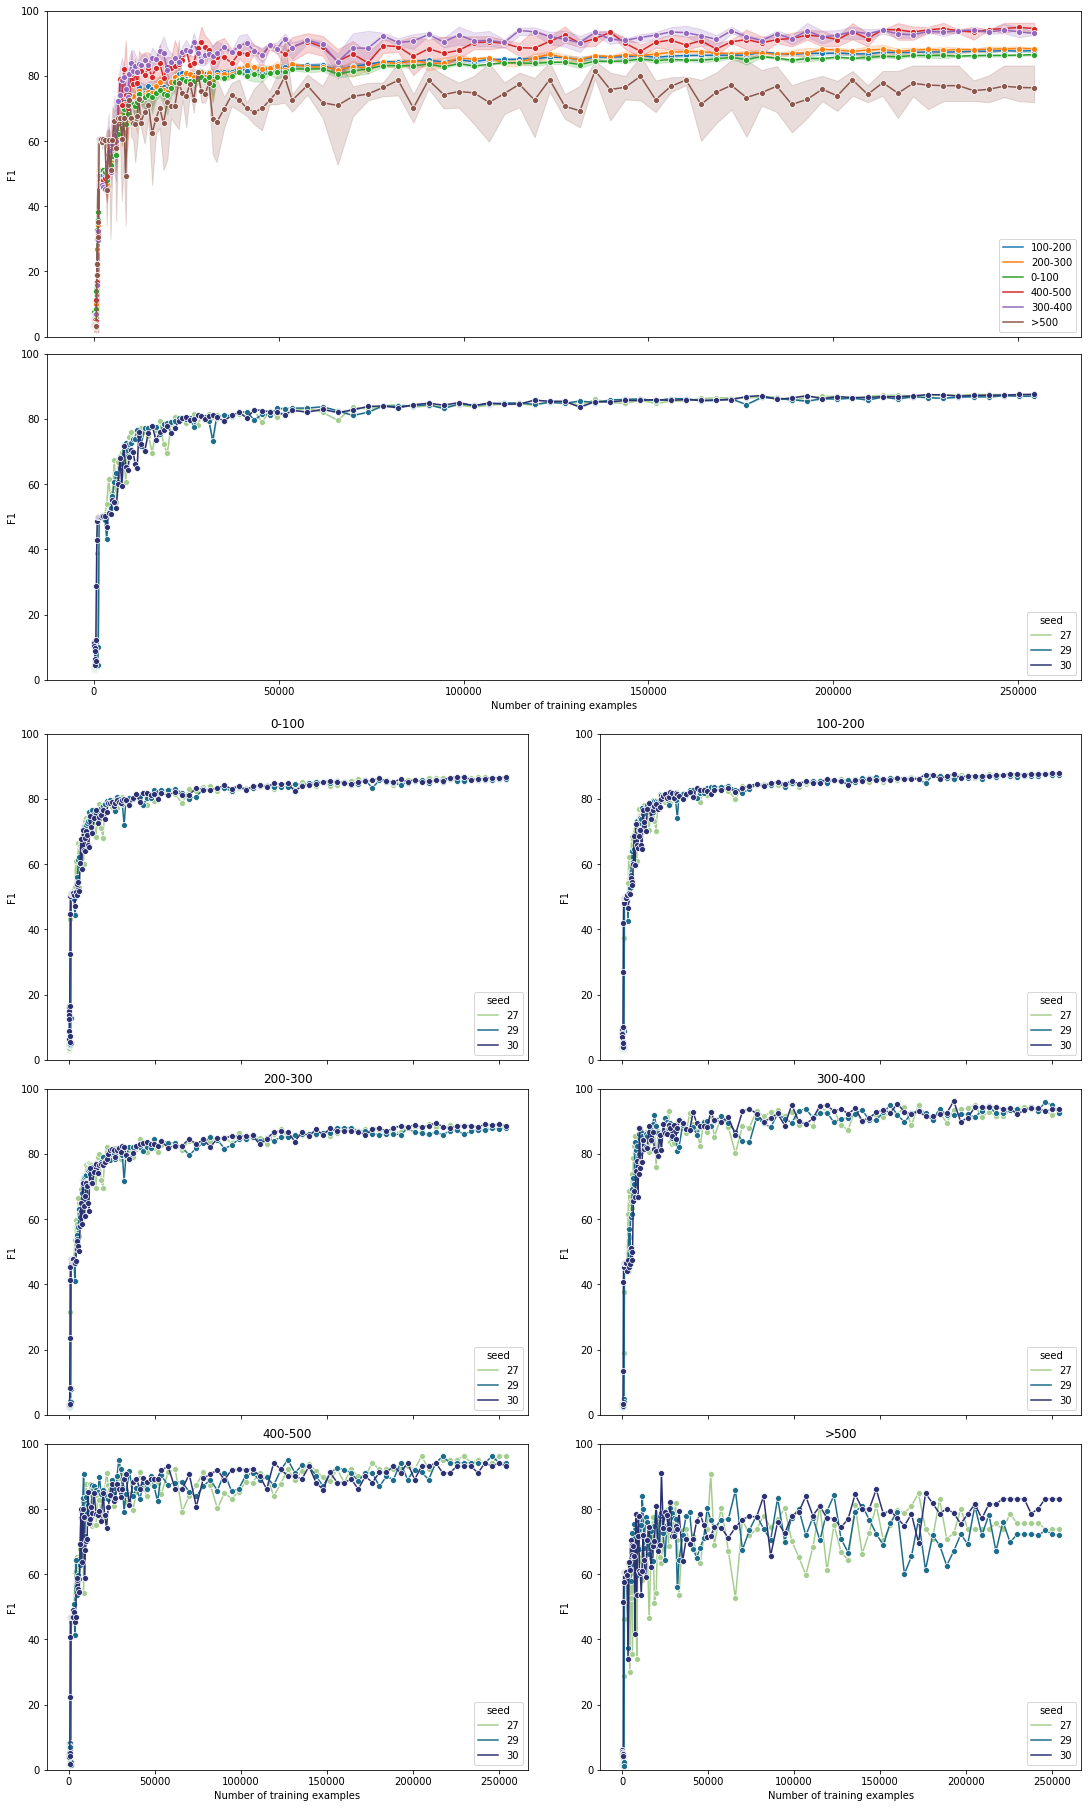

In [23]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '400-500'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('400-500')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '400-500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-100'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-100')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '0-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '200-300'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('200-300')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '200-300'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>500'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>500')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '>500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '100-200'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('100-200')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '100-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '300-400'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('300-400')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '300-400'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [24]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

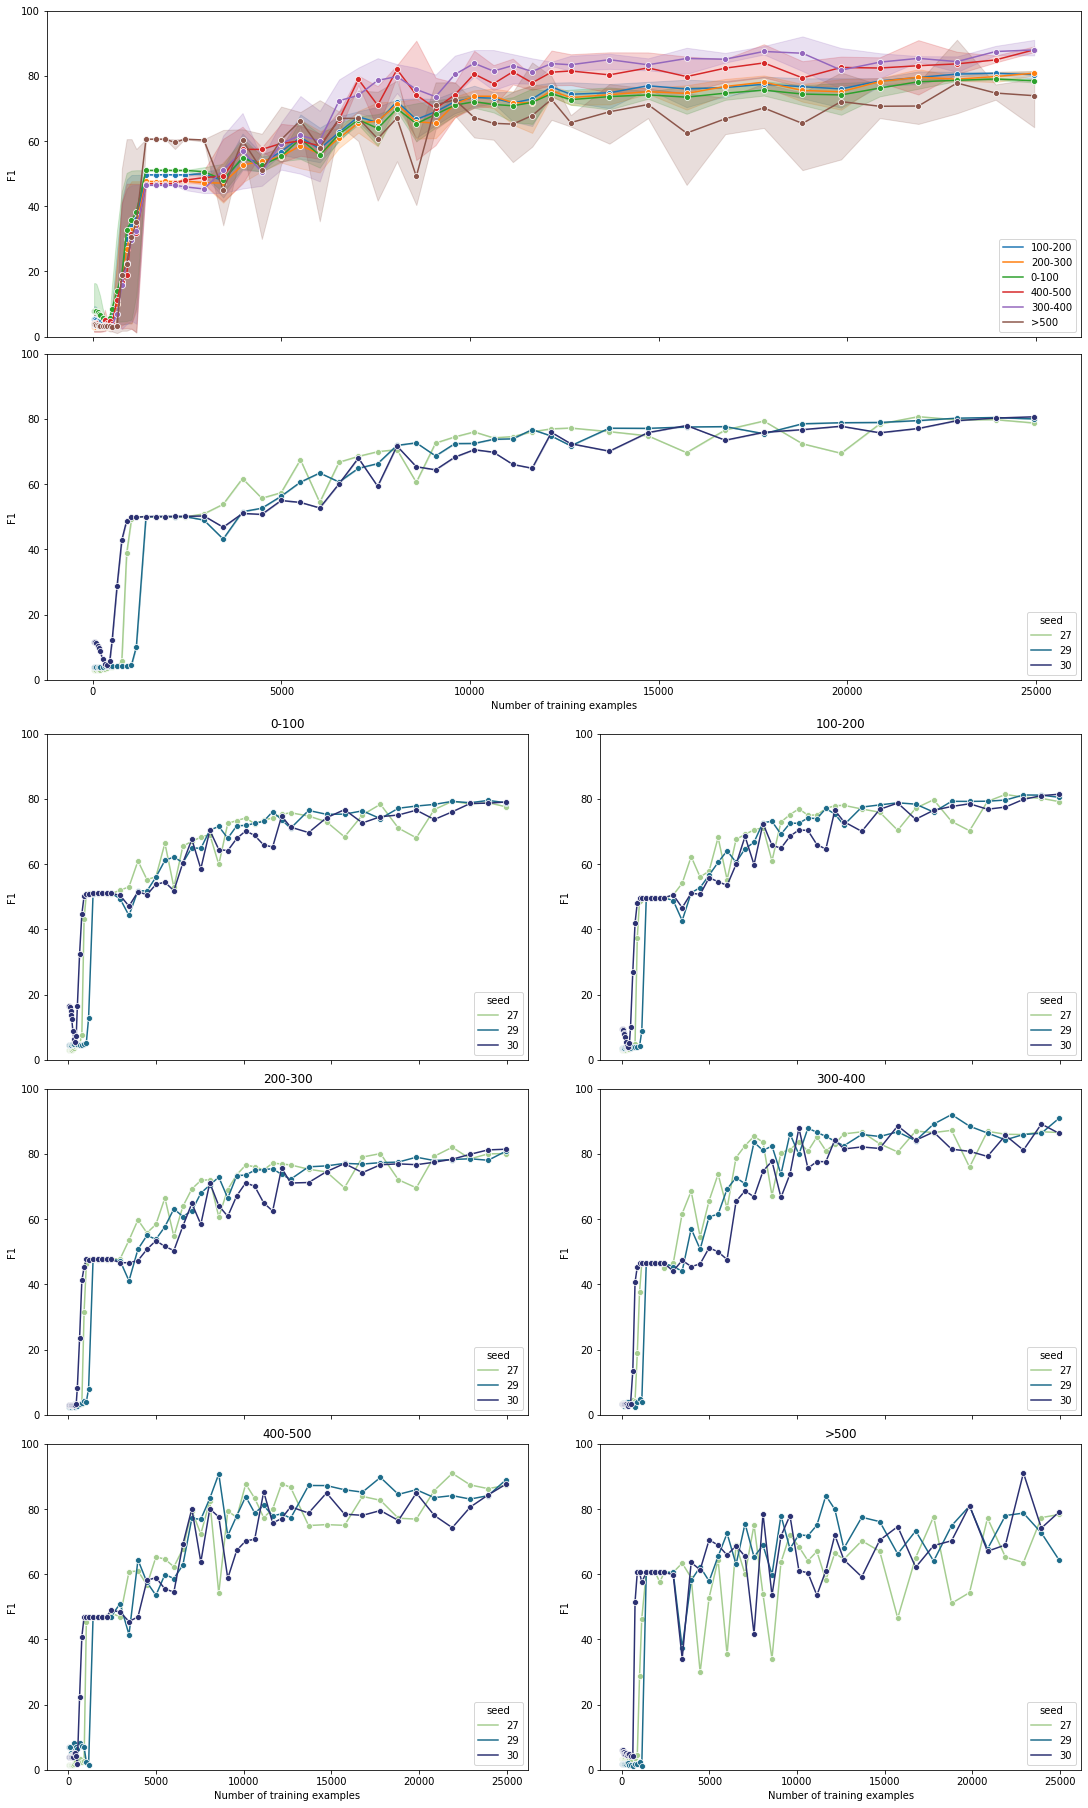

In [25]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '400-500'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('400-500')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '400-500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-100'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-100')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '0-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '200-300'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('200-300')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '200-300'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>500'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>500')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '>500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '100-200'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('100-200')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '100-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '300-400'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('300-400')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '300-400'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

## Question length

In [26]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [27]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2160, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,question_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.075064,2.735966,6661,0.064020,5.737602,3124,0.084818,0.084818,3537,53.100135,0.0,53.101803,0.0,5-10,1,2.88437,0.075802,27,32
1,0.000000,3.232719,707,0.000000,6.802180,336,0.000000,0.000000,371,52.475248,0.0,52.475248,0.0,0-5,1,2.88437,0.075802,27,32
2,0.109230,2.948162,3662,0.103788,5.498790,1927,0.115274,0.115274,1735,47.378482,0.0,47.378482,0.0,10-15,1,2.88437,0.075802,27,32
3,0.000000,3.605661,716,0.000000,5.699015,453,0.000000,0.000000,263,36.731844,0.0,36.759777,0.0,15-20,1,2.88437,0.075802,27,32
4,0.000000,2.525356,106,0.000000,3.569170,75,0.000000,0.000000,31,29.245283,0.0,29.245283,0.0,20-25,1,2.88437,0.075802,27,32


In [28]:
metrics_by_cat['question_length_bin'].unique()

array(['5-10', '0-5', '10-15', '15-20', '20-25', '>25'], dtype=object)

### Full checkpoints

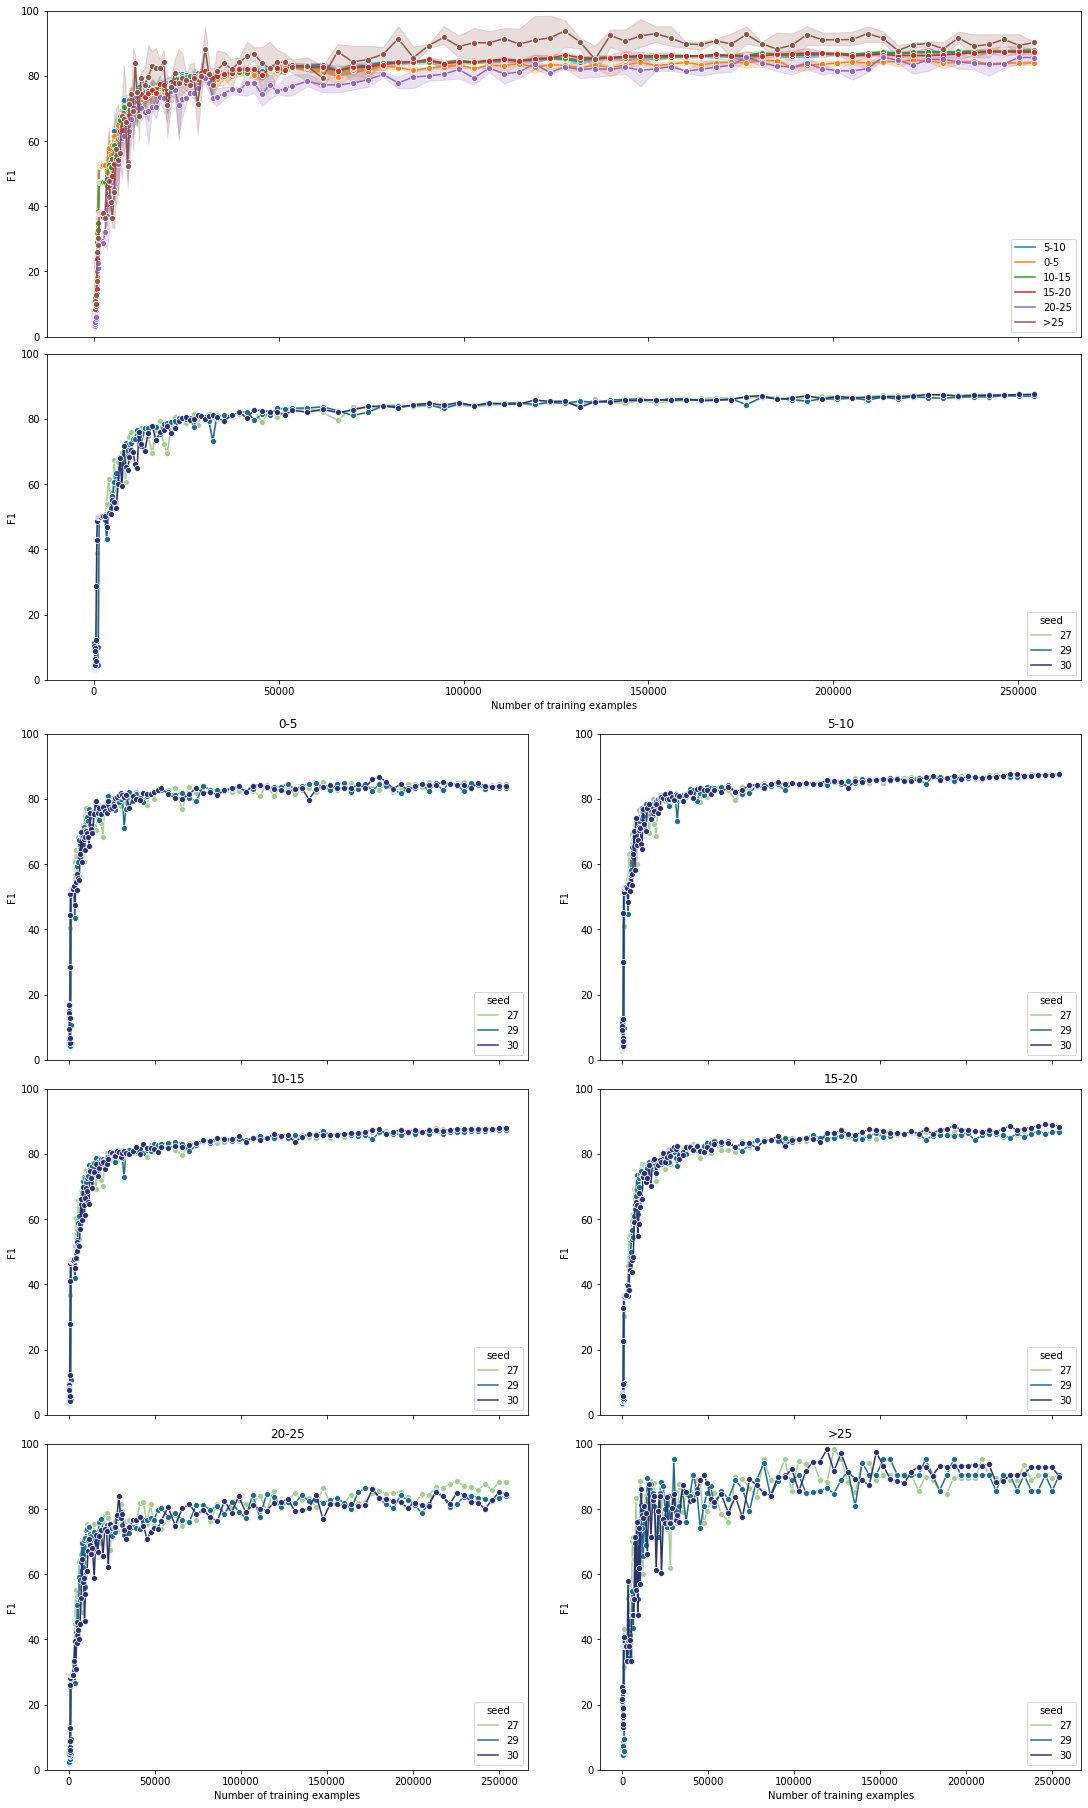

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '20-25'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('20-25')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '20-25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>25'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>25')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '>25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '5-10'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('5-10')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '15-20'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('15-20')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '15-20'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [30]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

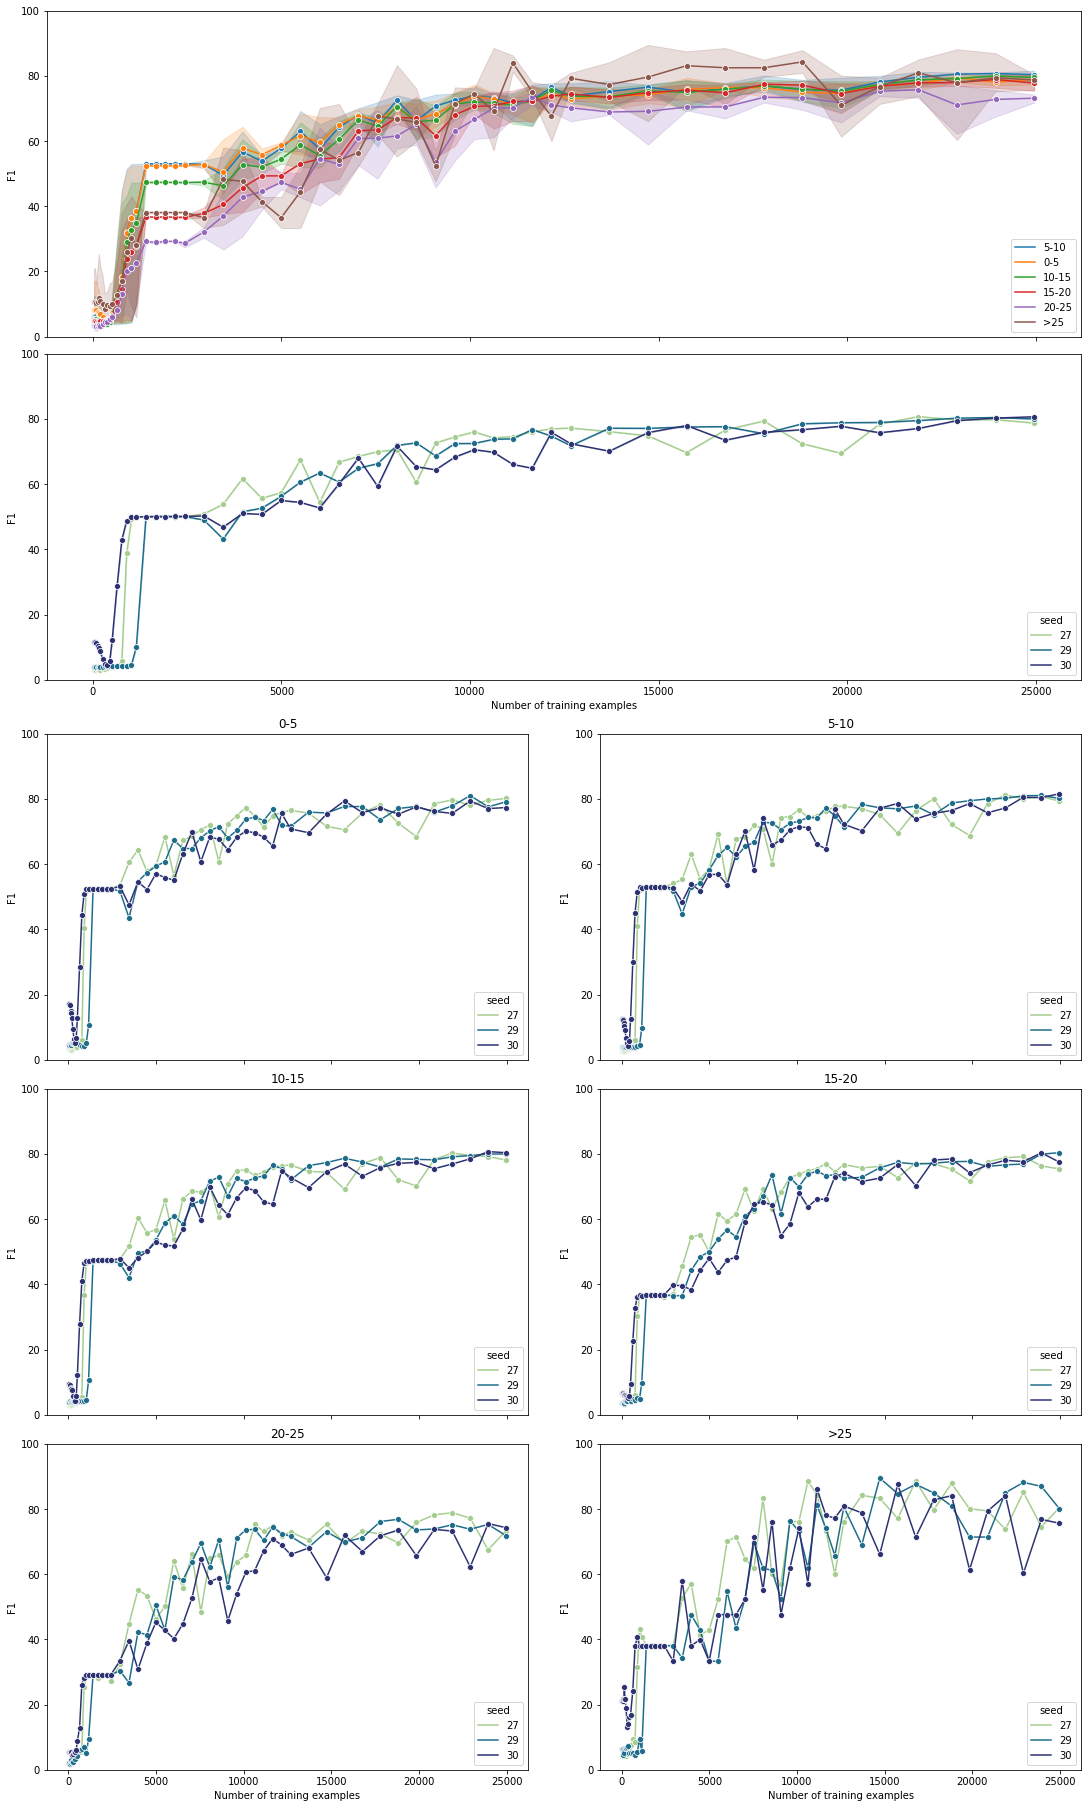

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '20-25'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('20-25')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '20-25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>25'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>25')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '>25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '5-10'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('5-10')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '15-20'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('15-20')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '15-20'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()